# Lab 5

In [1]:
import os
import sys

from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from IPython.display import Image

In this lab, we'll learn how to create and execute circuits using QISKit, a software development kit for working with IBM Q. As a simple first example, let's study the circuit below.

![hyperlink](https://www.dropbox.com/s/bbayjcnf0ejrb43/Screenshot%202018-03-21%2009.04.08.png?raw=1)

In this example, we have a qubit register labelled "q[0]" and a classical register labelled "c". The classical register is used to store the results of quantum measurements. In this circuit, an X gate is performed on a qubit in state $|0\rangle$, and then the qubit is measured in the comptuational basis. Let's see how this is implemented in QISKit.

We start by initilalizing our registers:

In [2]:
qp = QuantumProgram()

n = 1  # number of qubits
q = qp.create_quantum_register("q", n) # quantum register
c = qp.create_classical_register("c", n) # classical register

Next, we build and execute the circuit:

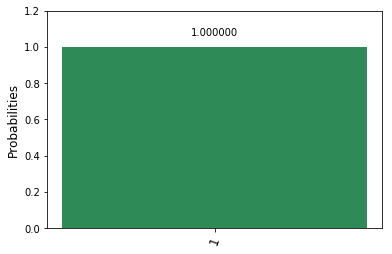

In [3]:
# create the circuit. this function takes as input
# the name of the circuit (in this case "single_x")
# and a list of quantum and classical registers.
single_x = qp.create_circuit("single_x", [q], [c])

# add an X-gate to the quantum register
single_x.x(q[0])

# add measurement operation. give the qubit to be
# measurement and the classical register where the
# result will be stored.
single_x.measure(q[0], c[0])

# execute the circuit
results = qp.execute("single_x")

# plot the measurement results.
plot_histogram(results.get_counts("single_x"))

The histogram above gives the probability of each measurement result. In this case, because the qubit is in the state $|1\rangle$ after the X-gate is applied, we are guaranteed to measure 1.

A list of QISKit gate commands can be found [here](https://www.qiskit.org/documentation/_autodoc/qiskit.CompositeGate.html).

## 1. Practice with single-qubit circuits.

(a) Execute the following 5 gate sequences using QISKit. Display the measurement probabilities after each gate sequence as a histogram.

![hyperlink](https://www.dropbox.com/s/6cz6vh6dxxzivte/Screenshot%202018-03-21%2009.35.43.png?raw=1)

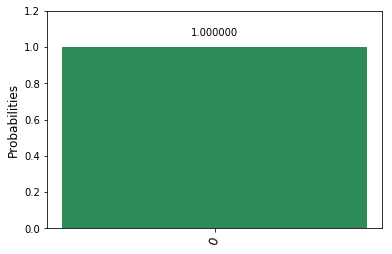

In [4]:
# circuit #1
# create the circuit
single_I = qp.create_circuit("single_I", [q], [c])
# add Hadamard gate to the quantum register
single_I.h(q[0])
# measure in superposition basis
single_I.h(q[0])
single_I.measure(q[0], c[0])
# execute the circuit
results = qp.execute("single_I")
# plot the measurement results
plot_histogram(results.get_counts("single_I"))

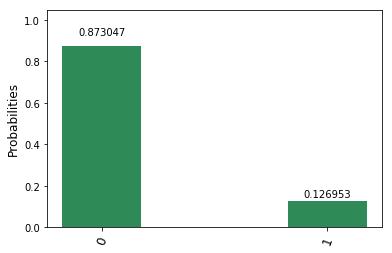

In [5]:
# circuit #2
# create the circuit
single_T = qp.create_circuit("single_T", [q], [c])
# add Hadamard & T gates to the quantum register
single_T.h(q[0])
single_T.t(q[0])
# measure in superposition basis
single_T.h(q[0])
single_T.measure(q[0], c[0])
# execute the circuit
results = qp.execute("single_T")
# plot the measurement results
plot_histogram(results.get_counts("single_T"))

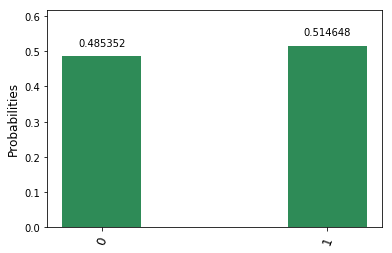

In [6]:
# circuit #3
# create the circuit
single_S = qp.create_circuit("single_S", [q], [c])
# add Hadamard & S gates to the quantum register
single_S.h(q[0])
single_S.s(q[0])
# measure in superposition basis
single_S.h(q[0])
single_S.measure(q[0], c[0])
# execute the circuit
results = qp.execute("single_S")
# plot the measurement results
plot_histogram(results.get_counts("single_S"))

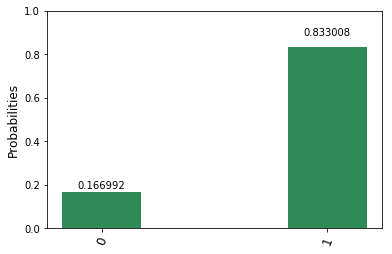

In [7]:
# circuit #4
# create the circuit
single_ST = qp.create_circuit("single_ST", [q], [c])
# add Hadamard & S & T gates to the quantum register
single_ST.h(q[0])
single_ST.s(q[0])
single_ST.t(q[0])
# measure in superposition basis
single_ST.h(q[0])
single_ST.measure(q[0], c[0])
# execute the circuit
results = qp.execute("single_ST")
# plot the measurement results
plot_histogram(results.get_counts("single_ST"))

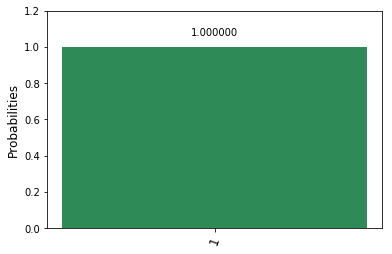

In [8]:
# circuit #5
# create the circuit
single_Z = qp.create_circuit("single_Z", [q], [c])
# add Hadamard & Z gates to the quantum register
single_Z.h(q[0])
single_Z.z(q[0])
# measure in superposition basis
single_Z.h(q[0])
single_Z.measure(q[0], c[0])
# execute the circuit
results = qp.execute("single_Z")
# plot the measurement results
plot_histogram(results.get_counts("single_Z"))

(b) Plot the final state of each gate sequence (that is, the state before the measurement) on the Bloch sphere.

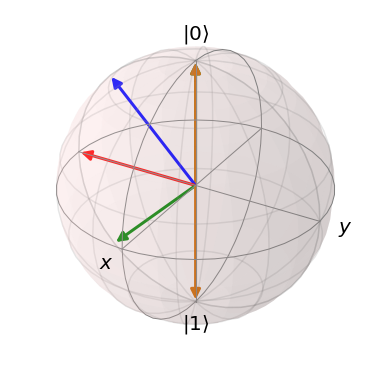

In [9]:
# save the states from part (a)
# these expected states are from the probability histograms of the 
# expected outputs from part (a) (rounded to fraction since there 
# is noise in the system, which is why we don't have perfect fraction
# probabilities)
state1 = basis(2,0) # 1|0> + 0|1>
state2 = snot() * snot() * state1
state3 = snot() * rz(np.pi/4) * snot() * state1
state4 = snot() * rz(np.pi/2) * snot() * state1
state5 = snot() * rz(np.pi/2) * rz(np.pi/4) * snot() * state1
state6 = snot() * sigmaz() * snot() * state1

# show our Bloch sphere
sphere = Bloch()
sphere.add_states([state1, state2, state3, state4, state5, state6])
sphere.show()

(c) Provide a physical interpretation of what is happening.

# Physical Interpretation:

As we can see, initially the qubit is in position |0> ket (pointing directly to the top of the Bloch sphere), and slowly rotates into the position |1> ket (pointing directly to the bottom of the Bloch sphere). This is a rotation about the y-axis. If we want to give a more precise physical interpretation, like in the case of electron, this is analogous to the rotation of a spin-up to spin-down of an electron qubit (assuming the qubit is an electron).

## 2. A two-qubit circuit.

Let's now implement a few two-qubit circuits. In the following exercises, we'll represent CNOT gates with gate diagrams that look like this:
![hyperlink](https://www.dropbox.com/s/6d2kyg600vtzmt3/Screenshot%202018-03-21%2009.41.34.png?raw=1)

Here the qubit with the smaller circle is the control qubit and the qubit with the plus sign inside the bigger circle is the target qubit.

Now consider the following two-qubit circuit:
![hyperlink](https://www.dropbox.com/s/iq9dmai17kyow5x/Screenshot%202018-03-21%2009.44.58.png?raw=1)

In this circuit, we apply an X-gate to Qubit 0, followed by a CNOT gate with Qubit 0 as the control and Qubit 1 as the target. We then perform two measurements: first, we measure Qubit 0, and then we measure Qubit 1. We're going to study this circuit using both QuTiP and QISKit. 

(a) Create the initial state in QuTiP.

In [25]:
# generate the initial state as the tensor |00>
initial_state = tensor(basis(2,0), basis(2,0))
display(initial_state)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

(b) Find the state of the two-qubit system (using QuTiP) after the X gate is applied.

In [30]:
# create identity gate for tensoring for 2 qubits
I_gate = Qobj([[1,0],[0,1]])
# generate 2-qubits X-gate on first rail only
X2q = tensor(sigmax(), I_gate)
# apply it and display
state_after_X2q = X2q * initial_state
display(state_after_X2q)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

(c) Find the state of the two-qubit system (using QuTiP) after the CNOT gate is applied.

In [46]:
# CNOT is tensor(Identity, X)
# initialize CNOT
CNOT = tensor(I_gate, sigmax())

# apply it and display
state_after_CNOT = CNOT * state_after_X2q
display(state_after_CNOT) # this is correct, |10> -> |11>

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

(d) What are possible measurement results of the first measurement and their corresponding probabilities? (Remember, we're measuring Qubit 0 only, not both qubits at once.)

# Possible measurement results:

Since we are measuring Qubit 0 only, but we still have a 2-qubits state, the possible measurements results are 00, 01, 10 or 11.

Since we have our final state be |11> and have not introduced any superposition through the Hadamard gate, we have:
Probability of measuring 0 for the first qubit = 0.00 (0%)
Probability of measuring 1 for the first qubit = 1.00 (100%)

Therefore, our measurement probabilities are the following:

00 --> 0% 

01 --> 0%

10 --> 100%

11 --> 0%

(In practice there is some noise and error in the physical quantum computer so the probabilities wouldn't be 100%).

(e) What are the possible measurement results of the second measurement and their corresponding probabilities?

# Possible measurement results:

From the same logic as in part (d), we still have a 2-qubits state, the possible measurements results are 00, 01, 10 or 11.

Since we have our final state be |11> and have not introduced any superposition through the Hadamard gate, but we have already measured qubit 0 (and thus collapsed qubit 0 to state 1), we have:
Probability of measuring 0 for the second qubit = 0.00 (0%)
Probability of measuring 1 for the second qubit = 1.00 (100%)
with probability of measuring 1 for the first qubit as 100%.

Therefore, our measurement probabilities are the following:

00 --> 0% 

01 --> 0%

10 --> 0%

11 --> 100%


(In practice there is some noise and error in the physical quantum computer so the probabilities wouldn't be 100%).

(f) Now execute this circuit in QISKit and print the measurement probabilities as a histogram. Do your results agree with part (e)?

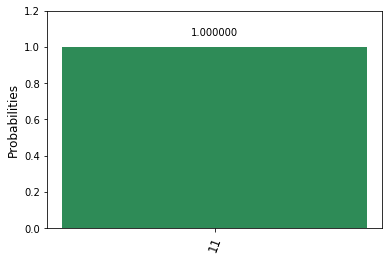

In [45]:
# Problem 2 circuit
# initialize circuit parameters
qp2 = QuantumProgram()
n2 = 2  # number of qubits
q2 = qp2.create_quantum_register("q2", n2) # quantum register (2)
c2 = qp2.create_classical_register("c2", n2) # classical register (2)
# initialize the circuit
p2_circuit = qp2.create_circuit("p2_circuit", [q2], [c2])
# add gates
p2_circuit.x(q2[0]) # X
p2_circuit.cx(q2[0], q2[1]) # CNOT, control 0, target 1
# measure both qubits
p2_circuit.measure(q2[0], c2[0]) # quantum register 0 mapped to classical 0
p2_circuit.measure(q2[1], c2[1]) # quantum register 1 mapped to classical 1
# execute the circuit
results2 = qp2.execute("p2_circuit")
# plot the measurement results
plot_histogram(results2.get_counts("p2_circuit"))

# Do our results agree?

Yes, we can see that our results agree. With probability of 1 (100%), we get that the first qubit is 1 and that we second qubit is 1, for a tensored 2-qubits state of |11>, just like we had predicted above. This is because we have not introduced a superposition basis like we previously did in Problem 1.